In [1]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('Affectnet/training.csv')
train_df = train_df[~((train_df['expression'] == 10) | (train_df['expression'] == 9))].reset_index(drop=True)
val_df = pd.read_csv('Affectnet/validation.csv')
val_df = val_df[~((val_df['expression'] == 10) | (val_df['expression'] == 9))].reset_index(drop=True)

In [3]:
train_df

,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,689/737db2483489148d783ef278f43f486c0a97e140fc...,134,134,899,899,181.64;530.91;188.32;627.82;195.1;723.37;205.2...,1,0.785714,-0.055556
1,392/c4db2f9b7e4b422d14b6e038f0cdc3ecee239b5532...,20,20,137,137,28.82;77.52;29.12;93.25;31.04;108.51;33.03;123...,0,-0.017253,0.004313
2,468/21772b68dc8c2a11678c8739eca33adb6ccc658600...,11,11,176,176,30.52;87.33;32.55;106.43;36.94;125.81;43.06;14...,0,0.174603,0.007937
3,944/06e9ae8d3b240eb68fa60534783eacafce2def60a8...,40,40,269,269,44.43;158.17;47.08;189.2;50.54;221.88;58.3;253...,1,0.153401,0.038890
4,993/02e06ee5521958b4042dd73abb444220609d96f57b...,22,22,153,153,50.59;78.72;48.6;93.23;48.72;109.06;48.8;123.0...,8,0.783972,-0.551684
...,...,...,...,...,...,...,...,...,...
320734,713/6f32a21c80cd0ee3368737782175bd0e0e78eb4566...,37,37,252,252,78.65;119.86;75.44;150.02;72.79;178.85;73.69;2...,2,-0.468254,-0.206349
320735,718/66c1886c5a0d828f175383c09d6f7abc1df28e4dc8...,18,18,221,221,37.27;98.81;36.76;128.05;39.84;158.31;45.42;18...,0,-0.056073,0.142340
320736,1215/65e2c4fe91780f417c0edf3c71561d0e41e4db248...,52,52,348,348,83.9;225.92;88.93;260.62;97.28;296.78;108.34;3...,2,-0.662960,-0.249501
320737,375/a0077b9ae7ab3fd9241dd0775cb9f88c1d8913c7af...,49,49,330,330,106.87;161.43;105.49;191.66;109.81;224.48;113....,2,-0.833333,-0.380952


In [4]:
val_df

,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,459/81456263be241927c7a59a2646f88c2700ce4b7cba...,147,147,981,981,233.58;512.99;246.97;623.96;262.53;733.87;285....,7,-0.653310,0.653310
1,680/cfa0c679da3dbe9f01e92cdeda2da1065aa50e7bf0...,99,99,666,666,98.98;341.86;107.43;422.6;123.41;503.32;144.97...,0,-0.176846,-0.077640
2,1042/83dac9d7eec7fb0bfef79b4d35ddc69a6f7fb458d...,16,16,133,133,42.69;79.9;42.94;90.59;43.83;101.27;44.2;112.5...,0,-0.367789,0.183895
3,887/49e4872adc501d5e69b8898930bbd4f4e037022874...,78,78,522,522,49.66;304.48;48.91;361.36;52.08;421.7;64.76;48...,4,-0.062911,0.532327
4,1057/0745dd0386476ae193ca709034378c9207e48ae88...,36,36,258,258,21.82;115.14;18.22;152.92;20.65;190.43;26.14;2...,0,0.004839,-0.004839
...,...,...,...,...,...,...,...,...,...
4495,960/fff1e48c3e93a94d3dee4eb7fd514f131a530abedd...,99,99,664,664,169.42;330.93;170.53;409.59;180.52;486.25;190....,6,-0.529100,0.707672
4496,860/7723c80e5a4875f023f124356dea3f6e50361e5d8f...,33,33,224,224,49.28;134.95;52.3;157.38;54.9;179.11;56.65;200...,6,-0.301587,0.238095
4497,957/66f024fee5e8dd72e9807787166ea5923d99ee5b03...,21,21,145,145,40.35;85.68;43.62;101.91;49.89;117.36;56.73;13...,3,-0.275842,0.590399
4498,417/8a553f8e144d055ee52f37a36025c157e2959ec393...,116,116,776,776,158.38;377.09;166.39;472.26;180.6;567.84;199.9...,2,-0.667828,-0.246806


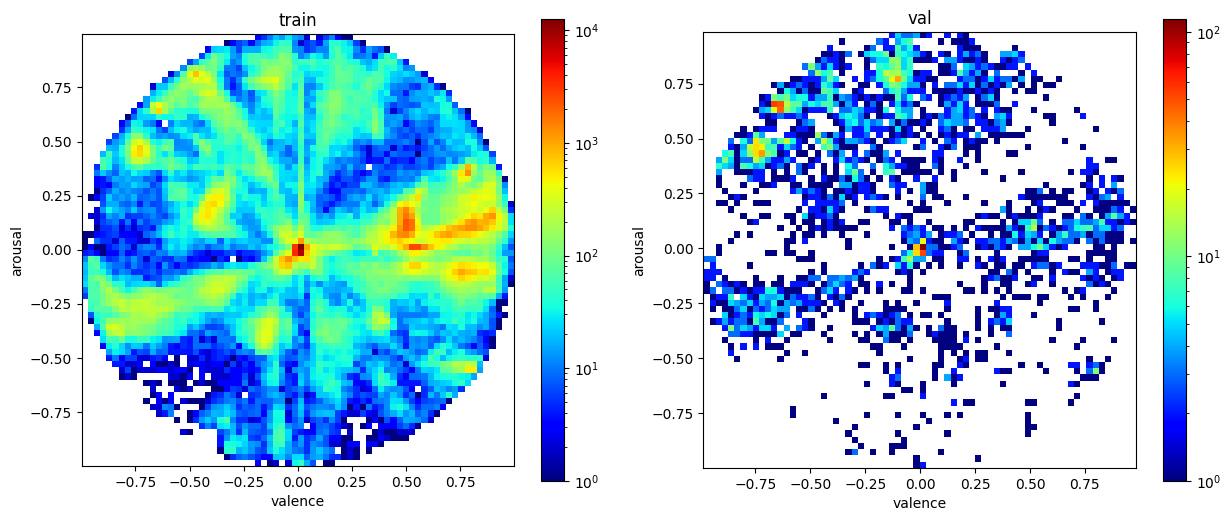

In [9]:
import matplotlib.cm as cm
import matplotlib.colors as cl

fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.15, hspace=0.6)
for i, df in enumerate([train_df, val_df]):
    x = np.array(df['valence'])
    y = np.array(df['arousal'])
    ax = fig.add_subplot(1, 2, i+1)
    ax.set_aspect('equal', adjustable='box')
    h = ax.hist2d(x,y, bins=70, cmap=cm.jet, norm=cl.LogNorm())
    ax.set_title(['train', 'val'][i])
    ax.set_xlabel('valence')
    ax.set_ylabel('arousal')
    fig.colorbar(h[3],ax=ax, shrink=0.4)
plt.show()

In [6]:
train_valaro = train_df[['valence', 'arousal']].to_numpy().T
val_valaro = val_df[['valence', 'arousal']].to_numpy().T

In [19]:
dd = train_df['arousal'].to_numpy().T
kernel = gaussian_kde(dd)
kernel(0)

array([2.42539051])

In [13]:
import torch
kernel = gaussian_kde(train_valaro, bw_method=0.2)
torch.tensor(kernel((0, 0))).squeeze()

tensor(2.9064, dtype=torch.float64)

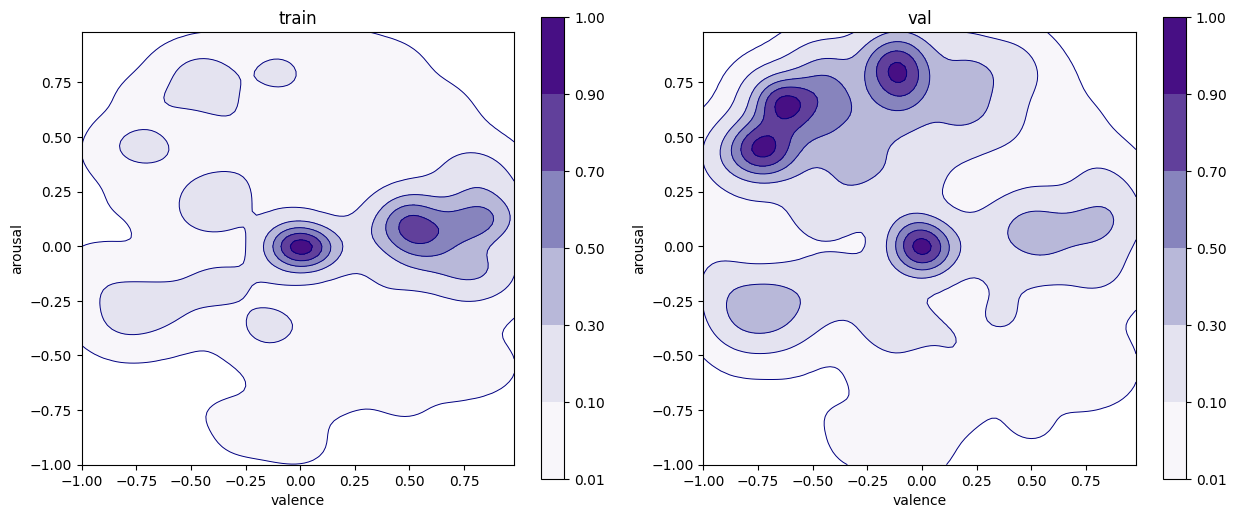

In [10]:
fig = plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.15, hspace=0.6)
for i, data in enumerate([train_valaro, val_valaro]):
    kernel = gaussian_kde(data, bw_method=0.2)
    xx,yy = np.mgrid[-1:1:0.02,-1:1:0.02]
    positions = np.vstack([xx.ravel(),yy.ravel()])
    f = np.reshape(kernel(positions).T, xx.shape)
    f = f / np.max(f)
    ll = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
    ax = fig.add_subplot(1, 2, i+1)
    ax.set_aspect('equal', adjustable='box')
    d = ax.contourf(xx, yy, f, cmap=cm.Purples, levels=ll)
    ax.contour(xx, yy, f, colors='#000080', linewidths=0.7, levels=ll)
    fig.colorbar(d ,ax=ax, shrink=0.4)
    ax.set_title(['train', 'val'][i])
    ax.set_xlabel('valence')
    ax.set_ylabel('arousal')
plt.show()